# Integration

How much solar power was available to be collected in Southampton in 2005?

To answer this, we need to *integrate* the solar irradiance data, to get the insolation,

\begin{equation}
  H = \int \text{d}t \, I(t).
\end{equation}

There's a data file containing the irradiance data (simplified and tidied up) from HelioClim in the repository. Let's load it in.

In [1]:
import numpy
data_southampton_2005 = numpy.loadtxt('../data/irradiance/southampton_2005.txt')

If we ask Python what the data is, it will show us the first and last few entries:

In [2]:
data_southampton_2005

array([[  0.00000000e+00,   0.00000000e+00],
       [  2.50000000e-01,   0.00000000e+00],
       [  5.00000000e-01,   0.00000000e+00],
       ..., 
       [  8.73525000e+03,   0.00000000e+00],
       [  8.73550000e+03,   0.00000000e+00],
       [  8.73575000e+03,   0.00000000e+00]])

Try looking at the data file in a text editor. The header comment says that the first column contains the time in hours since midnight, January 1st. We see that the file gives data every quarter of an hour for the year.

Let's plot the data to see the trend.

<IPython.core.display.Javascript object>


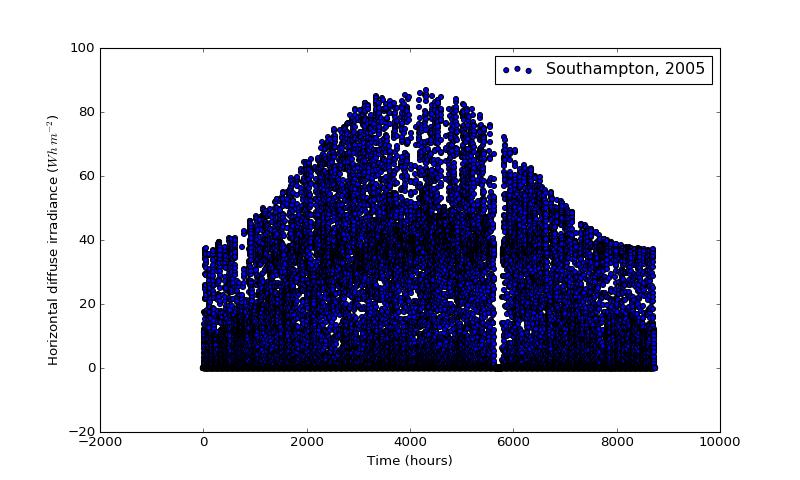

In [3]:
%matplotlib notebook
from matplotlib import pyplot

pyplot.figure(figsize=(10,6))
pyplot.scatter(data_southampton_2005[:,0], data_southampton_2005[:,1], label="Southampton, 2005")
pyplot.legend()
pyplot.xlabel("Time (hours)")
pyplot.ylabel(r"Horizontal diffuse irradiance ($Wh \, m^{-2}$)")
pyplot.show()

You'll need to zoom right in to see individual days. It's pretty noisy, and there's points where the data is corrupted. 

Still, integration should smooth that out.

Let's plot a small segment of the data - the first 200 data points, which is roughly 48 hours. We'll use that to think about integration.

<IPython.core.display.Javascript object>


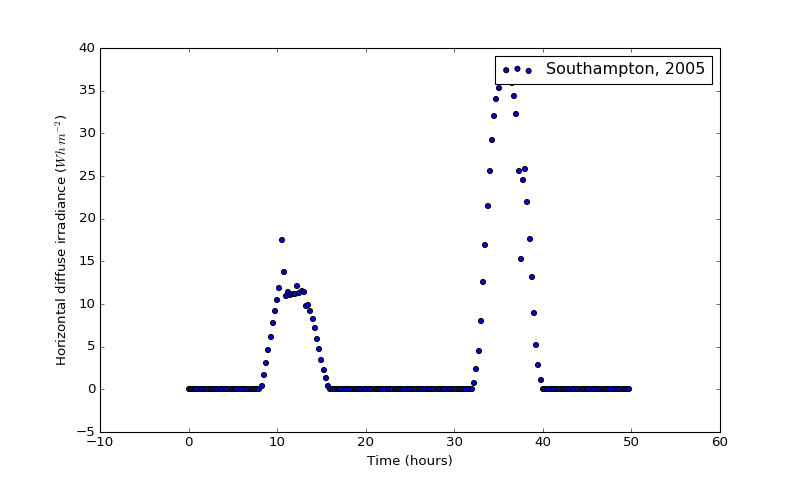

In [4]:
pyplot.figure(figsize=(10,6))
pyplot.scatter(data_southampton_2005[:200,0], data_southampton_2005[:200,1], label="Southampton, 2005")
pyplot.legend()
pyplot.xlabel("Time (hours)")
pyplot.ylabel(r"Horizontal diffuse irradiance ($Wh \, m^{-2}$)")
pyplot.show()

This is how the data looks as individual points. Let's instead plot it as a bar chart.

<IPython.core.display.Javascript object>


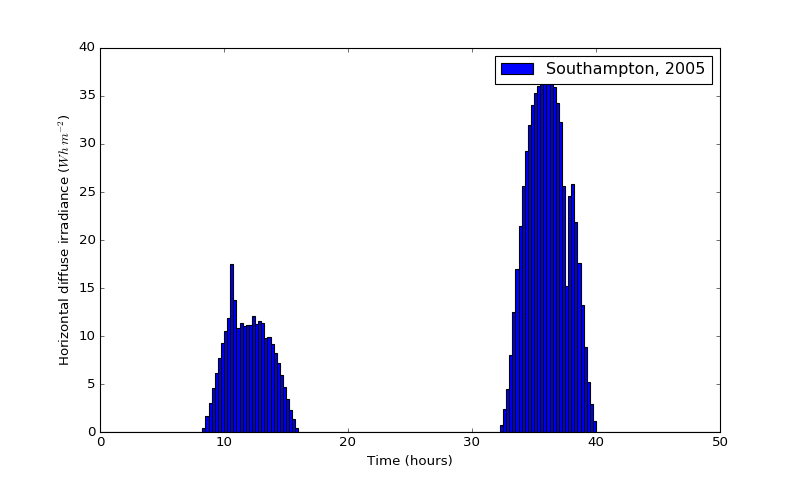

In [5]:
pyplot.figure(figsize=(10,6))
pyplot.bar(data_southampton_2005[:200,0], data_southampton_2005[:200,1], label="Southampton, 2005", width=0.25)
pyplot.legend()
pyplot.xlabel("Time (hours)")
pyplot.ylabel(r"Horizontal diffuse irradiance ($Wh \, m^{-2}$)")
pyplot.show()

The integral is the area under the curve. In deriving how to integrate, we split the domain into subintervals and approximate the area in that subinterval as the width of the subinterval times the (*constant*) value in that subinterval.

In other words: find the area of each bar, and add them up.

The area of each bar is the data value multiplied by the time step (a quarter of an hour, here).

So the total integral over these two days is given by:

In [6]:
dt = 0.25
H_48hours = dt * numpy.sum(data_southampton_2005[:200,1])
print("Two day insolation is {}".format(H_48hours))

Two day insolation is 230.4472


Is this a sensible number? There's roughly 8 hours of sun each day. On day 1 the maximum irradiance is around 10; on day 2 it's around 35. So the maximum value would be around $8 \times 10 + 8 \times 35 = 360$: we're in the right ballpark.

So the total insolation for 2005 is:

In [7]:
H = dt * numpy.sum(data_southampton_2005[:,1])
print("Insolation for Southampton in 2005 is {}".format(H))

Insolation for Southampton in 2005 is 123575.4169


##### Exercise

In the `data` directory you'll find data files for all the CDT sites for both 2004 and 2005. Compute the insolation for at least one more. If you're feeling inspired, try the [`glob`](https://docs.python.org/3/library/glob.html) library to compute them all automatically.

##### Solution

In [8]:
places = ["Bath", "Cambridge", "Liverpool", "Loughborough", "Oxford", "Sheffield", "Southampton"]
years = [2004, 2005]

from glob import glob

for place in places:
    for year in years:
        f = glob("../data/irradiance/{}_{}.txt".format(place.lower(), year))[0]
        data = numpy.loadtxt(f)
        H = dt * numpy.sum(data[:,1])
        print("Insolation for {} in {} is {}".format(place, year, H))

Insolation for Bath in 2004 is 470411.0
Insolation for Bath in 2005 is 473446.25
Insolation for Cambridge in 2004 is 451772.75
Insolation for Cambridge in 2005 is 451415.0
Insolation for Liverpool in 2004 is 479803.0
Insolation for Liverpool in 2005 is 489203.25
Insolation for Loughborough in 2004 is 425274.75
Insolation for Loughborough in 2005 is 443472.0
Insolation for Oxford in 2004 is 438635.0
Insolation for Oxford in 2005 is 457268.75
Insolation for Sheffield in 2004 is 389165.5
Insolation for Sheffield in 2005 is 434768.25
Insolation for Southampton in 2004 is 121659.83025
Insolation for Southampton in 2005 is 123575.4169


## Improving the integral

There's a problem with the simple rule that we've used, which is clear when we take a closer look at the data. Let's go back to our plots:

<IPython.core.display.Javascript object>


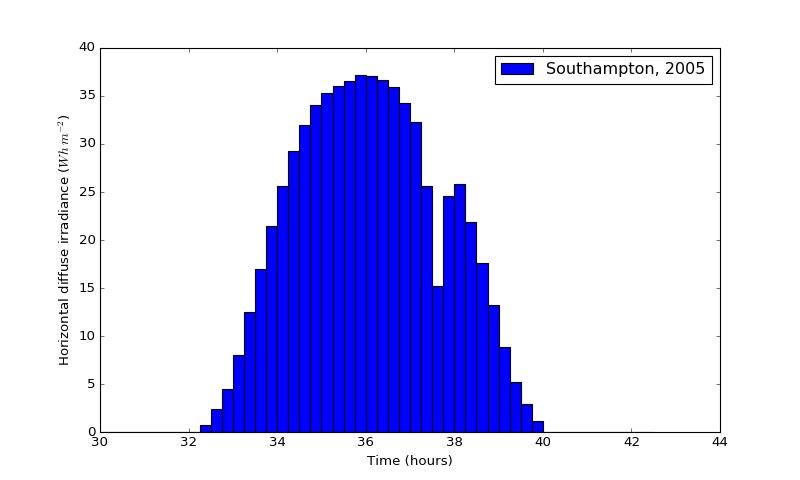

In [9]:
pyplot.figure(figsize=(10,6))
pyplot.bar(data_southampton_2005[120:170,0], data_southampton_2005[120:170,1], label="Southampton, 2005", width=0.25)
pyplot.legend()
pyplot.xlabel("Time (hours)")
pyplot.ylabel(r"Horizontal diffuse irradiance ($Wh \, m^{-2}$)")
pyplot.show()

There's a clear trend in the data, but we're sampling it very coarsely. We could imagine smoothing this data considerably. Even the simplest thing - joining the points with straight lines - would be an improvement:

<IPython.core.display.Javascript object>


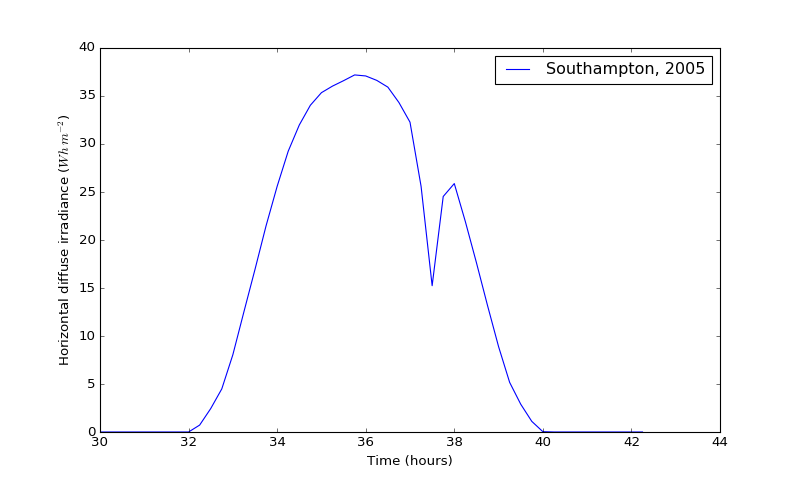

In [10]:
pyplot.figure(figsize=(10,6))
pyplot.plot(data_southampton_2005[120:170,0], data_southampton_2005[120:170,1], label="Southampton, 2005")
pyplot.legend()
pyplot.xlabel("Time (hours)")
pyplot.ylabel(r"Horizontal diffuse irradiance ($Wh \, m^{-2}$)")
pyplot.show()

The integral is still the area under this curve. And the full domain is still split up into quarter hour subintervals. The difference is that the irradiance is now a straight line on each subinterval, not a constant value. So each subinterval is represented by a *trapezoid*, not by a bar:

<IPython.core.display.Javascript object>


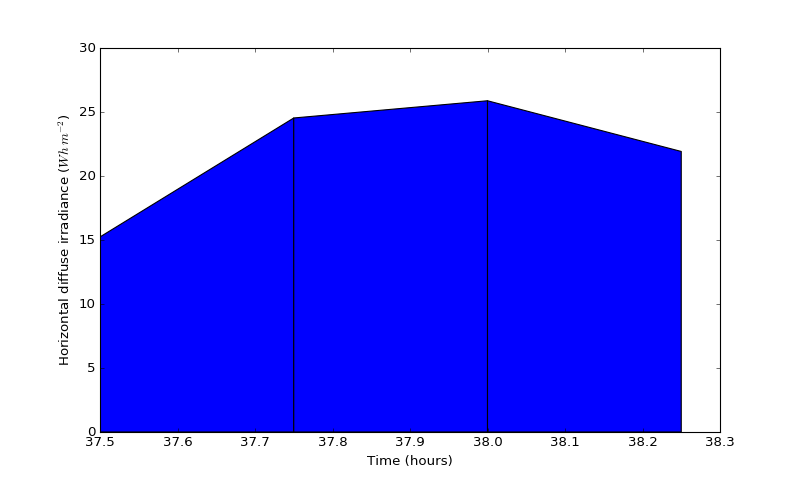

In [11]:
pyplot.figure(figsize=(10,6))
pyplot.fill_between(data_southampton_2005[150:152,0], data_southampton_2005[150:152,1])
pyplot.fill_between(data_southampton_2005[151:153,0], data_southampton_2005[151:153,1])
pyplot.fill_between(data_southampton_2005[152:154,0], data_southampton_2005[152:154,1])
pyplot.xlabel("Time (hours)")
pyplot.ylabel(r"Horizontal diffuse irradiance ($Wh \, m^{-2}$)")
pyplot.show()

The area of a trapezoid is given by its width times the *average* of the value at the left and right edge.

We now need some notation. We'll denote the times at which we have data as $t_j$, where $j$ is an integer, $j = 0, \dots, N$. So we have $N+1$ data points in all, leading to $N$ subintervals. The irradiance $I$ at time $t_j$ will be $I_j = I(t_j)$.

The $j^{\text{th}}$ subinterval has $t_j$ at its left edge and $t_{j+1}$ on its right. So the area of this subinterval is

\begin{equation}
  H_j = \frac{1}{2} \Delta t \, \left( I_j + I_{j+1} \right).
\end{equation}

The total insolation, which is the total integral, is the total area of all the subintervals: the sum of all the $H_j$:

\begin{equation}
  H = \sum_{j=0}^N \frac{1}{2} \Delta t \, \left( I_j + I_{j+1} \right).
\end{equation}

As the right edge of the $j^{\text{th}}$ subinterval is the left edge of the $(j+1)^{\text{th}}$ subinterval (except for the endpoints), every point except the first and last is counted twice. So we can rewrite this as

\begin{equation}
  H = \frac{\Delta t}{2} \, \left( I_{0} + I_{N} + 2 \sum_{j=1}^{N-1} I_j \right).
\end{equation}

This is the *trapezoidal rule*.

Let's test it:

In [12]:
H_trap = dt / 2.0 * (data_southampton_2005[0, 1] + data_southampton_2005[-1, 1] + 2.0*numpy.sum(data_southampton_2005[1:-1, 1]))
print("Insolation for Southampton using trapezoidal rule is {}".format(H_trap))

Insolation for Southampton using trapezoidal rule is 123575.41690000001
